In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons as moon
import seaborn as sns
import random
import json

## Data generating functions

In [2]:
# Generating data with one true cluster
def generate_data_uniform(n):
    datum = np.random.uniform(low=-1, high=1, size=[n, d-1])
    last_column = datum.sum(axis = 1)
    data = np.column_stack((datum, last_column))
    return data
def generate_data_uniform_sq(n):
    datum = np.random.uniform(low=-1, high=1, size=[n, d-1])
    datum_sq = datum**2
    last_column = datum_sq.sum(axis = 1)
    data = np.column_stack((datum, last_column))
    return data
def generate_data_uniform_cube(n):
    datum = np.random.uniform(low=-1, high=1, size=[n, d-1])
    datum_cub = datum**3
    last_column = datum_cub.sum(axis = 1)
    data = np.column_stack((datum, last_column))
    return data
def generate_data_uniform_prod(n):
    datum = np.random.uniform(low=-1, high=1, size=[n, d-1])
#     datum_cub = datum**3
    last_column = datum.prod(axis = 1)
    data = np.column_stack((datum, last_column))
    return data


def generate_data_normal(n):
    datum = np.random.normal(loc=0.0, scale=1.0, size=[n, d-1])
    last_column = datum.sum(axis = 1)
    data = np.column_stack((datum, last_column))
    return data
def generate_data_normal_sq(n):
    datum = np.random.normal(loc=0.0, scale=1.0, size=[n, d-1])
    datum_sq = datum**2
    last_column = datum_sq.sum(axis = 1)
    data = np.column_stack((datum, last_column))
    return data
def generate_data_normal_cube(n):
    datum = np.random.normal(loc=0.0, scale=1.0, size=[n, d-1])
    datum_sq = datum**3
    last_column = datum_sq.sum(axis = 1)
    data = np.column_stack((datum, last_column))
    return data
def generate_data_normal_prod(n):
    datum = np.random.normal(loc=0.0, scale=1.0, size=[n, d-1])
    last_column = datum.prod(axis = 1)
    data = np.column_stack((datum, last_column))
    return data


def generate_data_gama(n):
    datum = np.random.gamma(1,1, size=(n,d-1))
    last_column = datum.sum(axis = 1)
    data = np.column_stack((datum, last_column))
    return data
def generate_data_gama_sq(n):
    datum = np.random.gamma(1,1, size=(n,d-1))
    datum_sq = datum**2
    last_column = datum_sq.sum(axis = 1)
    data = np.column_stack((datum, last_column))
    return data
def generate_data_gama_cube(n):
    datum = np.random.gamma(1,1, size=(n,d-1))
    datum_sq = datum**3
    last_column = datum_sq.sum(axis = 1)
    data = np.column_stack((datum, last_column))
    return data
def generate_data_gama_prod(n):
    datum = np.random.gamma(1,1, size=(n,d-1))
    last_column = datum.prod(axis = 1)
    data = np.column_stack((datum, last_column))
    return data
# def generate_data_example(n):
#     data = []
#     for _ in range(n):
#         xs = []
#         for dimension in range(d - 1):
#             x = np.random.uniform(low=-1, high=1)
#             xs.append(x)
#         y = sum(xs)
#         datum = xs + [y]
#         data.append(datum)
#     return data



# Generating data with two true clusters

def generate_data_unif_2clusters(n):
    datum = []
    for dimension in range(d-1):
        mu = 0
        n1 = int(round(n/2,1))
        column = np.random.uniform(low=mu, high=mu+5, size = n1)
        # x1.append(column)
        n2 = int(n-round(n/2,1))
        increment = 6
        column2 = np.random.uniform(low=mu+increment, high=mu+2*increment, size = n2)
        col = np.concatenate((column,column2))
        datum.append(col)
    datum = np.transpose(datum)
    datum_sq = datum**2
    last_column = datum_sq.sum(axis= 1)
    data = np.column_stack((datum, last_column))
    return data

def generate_data_normal_2clusters(n):
    datum = []
    for dimension in range(d-1):
        mu = 0
        n1 = int(round(n/2,1))
        column = np.random.normal(loc=mu, scale=1.0, size = n1)
        # x1.append(column)
        n2 = int(n-round(n/2,1))
        increment = 6
        column2 = np.random.normal(loc=mu+increment, scale=1.0, size = n2)
        col = np.concatenate((column,column2))
        datum.append(col)
    datum = np.transpose(datum)
    datum_sq = datum**2
    last_column = datum_sq.sum(axis= 1)
    data = np.column_stack((datum, last_column))
    return data

def generate_data_conic(n):
    n1 = round(n/2)+1
    datum = -np.random.gamma(1,1,(n1,d))
    reversed_ind = list(reversed(np.arange(d)))
    datum1 = -datum[:, reversed_ind]
    data = np.concatenate((datum, datum1), axis =0 )[:n]
    return data

def generate_data_rectangle(n):
    n1 = round(n/2)+1
    datum = -np.random.gamma(1,1,(n1,d))
    reversed_ind = list(reversed(np.arange(d)))
    datum1 = -5-datum[:, reversed_ind]
    data = np.concatenate((datum, datum1), axis =0 )[:n]
    return data


def generate_data_unif_normal_clusters(n):
    data = []
    for dimension in range(d):
        mu = 0
        n1 = int(round(n/2,1))
        column = np.random.uniform(low=mu, high=mu+5, size = n1)
        # x1.append(column)
        n2 = int(n-round(n/2,1))
        increment = 6
        column2 = np.random.normal(loc=mu+increment, scale = 1.0, size = n2)
        col = np.concatenate((column,column2))
        data.append(col)
    data = np.transpose(data)
    return data

# Generating data with 3 true clusters

def generate_data_unif_3clusters(n):
    data = []
    for dimension in range(d):
        # mu = np.random.randint(4)
        mu = 0
        n1 = int(round(n/3,1))
        increment = 6
        column = np.random.uniform(low=mu, high=mu+increment, size = n1)

        increment = 6
        column2 = np.random.uniform(low=mu+increment, high=mu+2*increment, size = n1)

        n2 = int(n-round(n/3,1))+3
        increment = 6
        column3 = np.random.uniform(low=mu+2*increment, high=mu+3*increment, size = n2)

        col = np.concatenate((column, column2, column3))[:n]
        data.append(col)
    data = np.transpose(data)
    return data

def generate_data_normal_3clusters(n):
    data = []
    for dimension in range(d):
        # mu = np.random.randint(4)
        mu = 0
        n1 = int(round(n/3,1))
        increment = 6
        column = np.random.normal(loc=mu, scale = 1, size = n1)

        increment = 6
        column2 = np.random.normal(loc=mu+increment, scale = 1, size = n1)

        n2 = int(n-round(n/3,1))+3
        increment = 6
        column3 = np.random.normal(loc=mu+2*increment, scale = 1, size = n2)

        col = np.concatenate((column, column2, column3))[:n]
        data.append(col)
    data = np.transpose(data)
    return data

def generate_data_rectangle_norm(n):
    n1 = round(n/3)+1
    datum = -np.random.gamma(1,1, size = (n1,d))
    datum1 = np.random.normal(loc = -5, scale = 1 , size = (n1,d))
    reversed_ind = list(reversed(np.arange(d)))
    datum2 = -10-datum[:, reversed_ind]
    data = np.concatenate((datum, datum1, datum2), axis =0 )[:n]
    return data

def generate_data_conic_norm(n):
    n1 = round(n/3)+1
    datum = -np.random.gamma(1,1, size =(n1,d))
    datum1 = np.random.normal(loc = 2.5, scale = 1 , size = (n1,d))
    reversed_ind = list(reversed(np.arange(d)))
    datum2 = 6-datum[:, reversed_ind]
    data = np.concatenate((datum, datum1, datum2), axis =0 )[:n]
    return data

# Special data

def generate_data_makeblobs(n, d = 2, n_clusters = 3):
    '''
    Generates a 2d clustered data
    '''
    data,_ = make_blobs(n_samples=n, centers = n_clusters, n_features = d, random_state=42)
    return data
def generate_data_moon(n, d = 2):
    '''
    Generates a 2d moon shaped data
    '''
    if d == 2:
        X, y = moon(n, noise=0.092)
        return X
    else:
        pass
    

# Data generating methods
generate_data_methods = {
    # Data with one true cluster
    'uniform': generate_data_uniform, 
    'uniform_sq': generate_data_uniform_sq,
    'uniform_cube': generate_data_uniform_cube,
    'uniform_prod': generate_data_uniform_prod,
    'normal': generate_data_normal,
    'normal_sq': generate_data_normal_sq,
    'normal_cube': generate_data_normal_cube,
    'normal_prod': generate_data_normal_prod,
    'gamma': generate_data_gama,
    'gamma_sq': generate_data_gama_sq,
    'gamma_cube': generate_data_gama_cube,
    'gamma_prod': generate_data_gama_prod,
    # Data with two true clusters
    'uniform_2clust': generate_data_unif_2clusters,
    'normal_2clust': generate_data_normal_2clusters,
    'conic': generate_data_conic,
    'rectangle': generate_data_rectangle,
    'unif_normal': generate_data_unif_normal_clusters,
    # Data with three true clusters
    'unif_3clust': generate_data_unif_3clusters,
    'normal_3clust': generate_data_normal_3clusters,
    'conic_norm': generate_data_conic_norm,
    'rectangle_norm': generate_data_rectangle_norm,
    # Special Data
    'makeblobs': generate_data_makeblobs,
    'moon': generate_data_moon
}
data_dist_keys = list(generate_data_methods.keys())

### Online Balanced kmeans implementation

In [3]:
class OnlineBalancedKmeans:
    def __init__(self, k, d, alpha, beta, inference_method='merge_2', data_distribution = 'uniform'):
        self.k = k
        self.d = d
        # min_value
        # max_value
        
        # start editting: 05 / 07/ 2023 
        # Initialising clusters based on the data type
        self.cluster_means = generate_data_methods[data_distribution](self.k)
#         if generate_data == 'uniform':
#             # self.cluster_means = np.random.uniform(low=-1, high=1, size=[k,d])
#             self.cluster_means = np.random.choice()
#         elif generate_data = 'normal':
#             self.cluster_means = np.random.normal(loc = 0, scale = 1, size = [k,d])
#         elif generate_data == 'gamma':
#             self.cluster_means = np.random.gamma(1,1, size = [k,d])
        # self.cluster_means = np.random.uniform(low=min_value, high=max_value, size=[k,d])
        # 05 / 07/ 2023 :end editting
        
        self.cluster_counts = np.ones(k)
        self.alpha = alpha
        self.beta = beta
        self.cluster_indices = []

        self.infer = None
        method = inference_method['method']
        del inference_method['method']
        if method == 'euclidean_distance':
            self.infer = lambda point: self.infer_euclid_dist(point, **inference_method)
        elif method == 'norm_weights':
            self.infer = lambda point: self.infer_norm_weights(point, **inference_method)
        elif method == 'cluster_size':
            self.infer = lambda point: self.infer_cluster_size(point, **inference_method)
        elif method == 'weights':
            self.infer = lambda point: self.infer_weights(point, **inference_method)
        elif method == 'merge':
            self.infer = lambda point: self.infer_merge_norm_cl_size(point, **inference_method)
        elif method == 'merge_2':
            self.infer = lambda point: self.infer_merge_norm_ecl_dis(point, **inference_method)
        elif method == 'cls_sz_exp':
            self.infer = lambda point: self.infer_cluster_size_exp(point, **inference_method)
        #assert self.infer is not None
        
        

    def compute_weights(self):
        '''
        return weights that penalize clusters with
        many points during assignments
        '''
        return np.array([self.beta*(np.mean(self.cluster_counts) - cluster_count) / (np.std(self.cluster_counts) + 1e-9) for cluster_count in self.cluster_counts])

    def assign_and_update(self, point):
        """
        Does an online k-means update on a single data point.
        Args:
            point - a 1 x d array
        Returns:
            An integer in [0, k-1] indicating the assigned cluster.
        Updates cluster_means and cluster_counts in place.
        For initialization, random cluster means are needed.
        """

        cluster_distances = np.sum(np.sqrt((point - self.cluster_means)**2), axis = 1)
        #cluster_distances = np.zeros(self.k)
        # for cluster in range(self.k):
        #     cluster_distances[cluster] = sum(np.sqrt((point - self.cluster_means[cluster])**2))
        #     # cluster_distances[cluster] = sum(np.sqrt((point - self.cluster_means[cluster])**2))
        cluster_weights = self.compute_weights()
        cluster_index = np.argmin(cluster_distances - cluster_weights)
        self.cluster_counts[cluster_index] += 1
        self.cluster_means[cluster_index] = self.alpha * np.array(point) + (1 - self.alpha) * self.cluster_means[cluster_index]
        self.cluster_indices.append(cluster_index)
        #print(cluster_index, cluster_distances[cluster_index], cluster_weights[cluster_index], cluster_distances[0], cluster_weights[0])
        return cluster_index

    def final_clusters(self, data):
        centroids = []
        labels = []
        cluster_weights = self.compute_weights()
        for x in data:
            dists = cluster_distances = np.sum(np.sqrt((x - self.cluster_means)**2), axis = 1)
            label = np.argmin(dists-cluster_weights)
            #centroids.append(self.centroids[label])
            labels.append(label)
        # cluster_counts = np.unique(labels, return_counts= True)
        return labels

    def view_final_clusters(self, data):# for 2d
        for index, data_point in enumerate(data):
            self.assign_and_update(data_point)
        labels = self.final_clusters(data)
        class_indices = self.cluster_indices
        #print(len(class_indices),len(true_labels[:index]))
        sns.scatterplot(x=[X[0] for X in data],
                      y=[X[1] for X in data],
                      hue=labels,
                      #style=true_labels,
                      palette="deep",
                      legend=None
                      )
        class_centers = self.cluster_means
        class_counts = np.unique(labels, return_counts=True)[1]
        # class_counts = kmeans.cluster_counts
        X = [x for x, _ in class_centers]
        Y = [y for _, y in class_centers]
        plt.plot(X, Y, 'r+', markersize=10, )
        # add labels to all points
        # np.unique(labels, return_counts=True)
        for (xi, yi, counts) in zip(X, Y, class_counts):
            plt.text(xi, yi, counts, va='bottom', ha='center')
        plt.title('Final iteration')
        plt.show()

    def infer_old(self, point):
        # Warning: Only works for d=2. TODO: Generalize to arbitrary dimensions.
        # Find closest mean in x coordinate.
        distances = np.zeros(self.k)
        for cluster in range(self.k):
            distances[cluster] = (point[0] - self.cluster_means[cluster, 0])**2
        cluster_index = np.argmin(distances)
        # Return y coordinate of closest mean.
        return self.cluster_means[cluster_index, 1]

    def infer_euclid_dist(self, point):
        """
        point = (d,) array ie (1 by d)
        """

        # Find the closest mean in the known coordinates
        distances = np.sqrt( np.sum( ( point[ : self.d-2 ] - self.cluster_means[ :, : self.d-2] )**2, axis = 1 ) )
        cluster_index = np.argmin( distances )
        inferred_val = self.cluster_means[cluster_index, self.d-1]
        # Return the unknown coordinates of the closest mean
        return inferred_val 

    def infer_norm_weights(self, point, beta = 7):
        distances = np.sqrt( np.sum( ( point[ : self.d-2 ] - self.cluster_means[ :, : self.d-2] )**2, axis = 1 ) )
        weights = np.exp(-beta*distances)
        normalized_weights = weights / sum(weights)
        # Return the estimate of the d_th coordinates of the closest mean using the weights
        inferred_val = sum(normalized_weights * self.cluster_means[:,d-1])
        return inferred_val

    def infer_cluster_size(self, point):
        point = np.array(point)
        # Find the 5 closest cluster means to the point and the total number of points in those clusters
        distances =  np.sum( ( point[ : self.d-2 ] - self.cluster_means[ :, : self.d-1] )**2, axis = 1 )
        cluster_indices = []
        for cluster in range(5):
            index = np.argmin( distances )
            cluster_indices.append(index)

            distances = np.delete(distances, index)
            #print("index:{} \n dist:{} \n means:{} \n count:{}".format(index, distances[:3], self.cluster_means[:3], self.cluster_counts[index]))

        total_counts = np.sum(self.cluster_counts[cluster_indices])
        #print(total_counts)
        # Compute their means
        inferred_vals = self.cluster_counts[cluster_indices]/total_counts @ self.cluster_means[cluster_indices,:]
        inferred_val = inferred_vals[self.d-1]
        return inferred_val

    def infer_weights(self, point, alpha=0.4, beta=7):
        overall_mean = self.cluster_counts @ self.cluster_means[:,d-1]/sum(self.cluster_counts)
        distances = np.sqrt( np.sum( ( point[ : self.d-2 ] - self.cluster_means[ :, : self.d-2] )**2, axis = 1 ) )
        weights = np.exp(-beta*distances)
        normalized_weights = weights / sum(weights)
        inferred_val = alpha*overall_mean + (1.0-alpha)*sum(normalized_weights * self.cluster_means[:,d-1])
        return inferred_val

    def infer_merge_norm_cl_size(self, point, alpha=1, beta = 7):
        infered_val = alpha * self.infer_norm_weights(point, beta) + (1 - alpha) * self.infer_cluster_size(point)
        return infered_val
    
    
    def infer_merge_norm_ecl_dis(self, point, alpha=0.9, beta = 7):
        infered_val = alpha * self.infer_norm_weights(point, beta) + (1 - alpha) * self.infer_euclid_dist(point)
        return infered_val
    def infer_cluster_size_exp(self, point, beta=8):
        # Find the 5 closest cluster means to the point and the total number of points in those clusters
        distances =  np.sum( ( point[ : self.d-2 ] - self.cluster_means[ :, : self.d-1] )**2, axis = 1 )
        cluster_indices = []
        for cluster in range(5):
            index = np.argmin( distances )
            cluster_indices.append(index)

            distances = np.delete(distances, index)
            #print("index:{} \n dist:{} \n means:{} \n count:{}".format(index, distances[:3], self.cluster_means[:3], self.cluster_counts[index]))

        total_counts = np.sum(self.cluster_counts[cluster_indices])
        #print(total_counts)
        # Compute their means
        inferred_vals = np.exp(-beta * self.cluster_counts[cluster_indices]/total_counts ) @ self.cluster_means[cluster_indices,:]
        inferred_val = inferred_vals[self.d-1]
        return inferred_val
    
# Inference methods
# inference_methods =[
#     {'method': 'euclidean_distance'}, {'method': 'norm_weights'}, {'method': 'cluster_size'}
# ]+[
#     {'method': 'weights', 'alpha': round(alpha,2) } for alpha in np.linspace(0,1,11) 
# ]+[
#     {'method': 'weights', 'beta': round(beta,2) } for beta in np.linspace(-2,10,13) 
# ] + [
#     {'method': 'merge', 'alpha': round(alpha,2)} for alpha in np.linspace(0,1,11)
# ]+ [
#     {'method': 'merge_2', 'alpha': round(alpha,2)} for alpha in np.linspace(0,1,11)
# ]
                    ##                             ##
                    ### Updated inference methods ###
                    ##                             ##
# inference_methods =[
#     {'method': 'euclidean_distance'}, {'method': 'norm_weights', 'beta': round(9,2) }, {'method': 'cluster_size'}
# ]+[
#     {'method': 'weights', 'alpha': round(0.4,2), 'beta': round(9,2) } 
# ]+ [
#     {'method': 'merge', 'alpha': round(0.9,2), 'beta': round(9,2)} 
# ]+ [
#     {'method': 'merge_2', 'alpha': round(0.7,2), 'beta': round(9,2)} 
# ] + [
#     {'method': 'cls_sz_exp', 'beta': round(9,2)} 
# ]


Plot losses 

Do repeat on the losses

Study the errors as its is learning 

x- number of train data assigned

y- error

Same plot showing the performance of hyperparameters

Variance of errors over the repeats

Confidence intervals on errors


#### Error Computing and the loss function 

In [4]:
# Evaluation script.
def compute_error(true_value, predicted_value):
    return np.sum((true_value - predicted_value) ** 2)

def kmeans_loss(kmeans, training_data):
    # Initialize loss to zero.
    loss = 0
    # For every point in training data set
    for point in training_data:
    #    Find coordinates of closest cluster center.
    #    Compute squared distance between point and closest cluster center.
        distances =  np.sum( ( point[ : kmeans.d-1 ] - kmeans.cluster_means[ :, : kmeans.d-1] )**2, axis = 1 )
        #    Add distance to loss.
        loss += np.min(distances, axis = 0)
    return loss

### Computing the errors

In [5]:
# k = 20 # number of pseudo-clusters
# d = 2 # number of features
# alpha_ = 0.2 # Learning rate associated with the means
# beta_ = 0.01 # Balances the size of the clusters
# n_train = 1000
# n_test = 100
# n_repeats = 4
# errors = []
# for inference_method in inference_methods:
    
#     distributions_error_mean = []
#     distributions_loss_mean = []
#     for data_dist_key in data_dist_keys:
#         distribution_errors = []
#         distribution_loss_repeat = []
#         for repeat in range(n_repeats):
#             data = generate_data_methods[data_dist_key](n_train + n_test)
#             training_data = data[:n_train]
#             test_data = data[n_train:]
#             assert len(training_data) == n_train
#             assert len(test_data) == n_test
#             #training_data = generate_data(n_train)
#             #test_data = generate_data(n_test)
#             kmeans = OnlineBalancedKmeans(k, d, alpha = alpha_, beta = beta_, inference_method=inference_method.copy(), data_distribution=data_dist_key) # TODO. Copy might not be necessary.
#             loss_vals = []
#             for datum in training_data:
#                 kmeans.assign_and_update(datum)
#                 if n_train%100 == 0
#                 cost = kmeans_loss(kmeans, training_data)
#                 loss_vals.append(round(cost, 4))
#             distribution_loss_repeat.append(loss_vals)
#             distribution_loss_mean = np.mean(distribution_loss_repeat, axis = 0)
#             inference_errors = []
#             for datum in test_data:
#                 true_value = datum[-1]
#                 predicted_value = kmeans.infer(datum)
#                 error = compute_error(true_value, predicted_value)
#                 inference_errors.append(round(error, 4))
#             distribution_errors.append(inference_errors)
#             distribution_error_mean = np.mean(distribution_errors, axis = 0)
                
#         distributions_error_mean.append(distribution_error_mean)  # dim = n_dist by n_test # Each row correspond to a distributions list of errors
#         distributions_loss_mean.append(distribution_loss_mean)  # dim = n_dist by n_train
#         print('[{},\t {}] \t Average error: {}'.format(data_dist_key, inference_method, round(np.mean(distributions_error_mean), 4)))
#     # A three dimensional metric of the Inference errors
#     errors.append(distributions_error_mean) # dim = n_infer by n_dist by n_train
#     #print('[{}] \t Average error: {}'.format(inference_method, round(np.mean(errors), 4) ))
# final_error_data = errors

In [7]:
# Inferences for testing
inference_methods = [
    {'method': 'euclidean_distance'}, {'method': 'norm_weights', 'beta': 7 }, {'method': 'cluster_size'}
]+[
    {'method': 'weights', 'alpha': 0.4, 'beta':7 } 
]+ [
    {'method': 'merge', 'alpha': 1, 'beta': 7} 
]+ [
    {'method': 'merge_2', 'alpha': 0.9, 'beta': 7} 
] + [
    {'method': 'cls_sz_exp', 'beta': 8} 
]


### Computing error updated codes

In [9]:
k = 20 # number of pseudo-clusters
d = 2 # number of features
alpha_ = 0.2 # Learning rate associated with the means
beta_ = 0.01 # Balances the size of the clusters
n_train = 1000
n_test = 100
n_repeats = 10

In [11]:
#data = generate_data_methods[data_dist_key](n_train + n_test)
inference_errors = {}
for inference_method in inference_methods:
    
    distribution_error_mean = {}
    # distributions_loss_mean = {}
    loss_vals = {}
    for data_dist_key in data_dist_keys:
        # distribution_errors = []
        #distribution_loss_repeat = {}
        
        data = generate_data_methods[data_dist_key](n_train + n_test)
        training_data = data[:n_train]
        test_data = data[n_train:]
        assert len(training_data) == n_train
        assert len(test_data) == n_test
        #training_data = generate_data(n_train)
        #test_data = generate_data(n_test)
        kmeans = OnlineBalancedKmeans(k, d, alpha = alpha_, beta = beta_, inference_method=inference_method.copy(), data_distribution=data_dist_key) # TODO. Copy might not be necessary.
        # loss_vals = []
        
        for datum in training_data:
            kmeans.assign_and_update(datum)
        cost = kmeans_loss(kmeans, training_data)
        loss_vals[data_dist_key]= round(cost, 4)
        #distribution_loss_repeat.append(loss_vals)
        #distribution_loss_mean = np.mean(distribution_loss_repeat, axis = 0)
        distribution_errors = []
        for repeat in range(n_repeats):
            for datum in test_data:
                true_value = datum[-1]
                predicted_value = kmeans.infer(datum)
                error = compute_error(true_value, predicted_value)
                distribution_errors.append(round(error, 4))
        distribution_error_mean[data_dist_key] = np.mean(distribution_errors)
                
        #distributions_error_mean.append(distribution_error_mean)  # dim = n_dist by n_test # Each row correspond to a distributions list of errors
        #distributions_loss_mean.append(distribution_loss_mean)  # dim = n_dist by n_train
        #print('[{},\t {}] \t Average error: {}'.format(data_dist_key, inference_method, round(np.mean(distributions_error_mean), 4)))
    # A three dimensional metric of the Inference errors
    inference_method_ = json.dumps(inference_method) 
    inference_errors[inference_method_] = list(distribution_error_mean.values())
    print('[{}] \t Average error: {}'.format(inference_method, round(np.mean(list(distribution_error_mean.values())), 4) ))
final_error_data = inference_errors

[{'method': 'euclidean_distance'}] 	 Average error: 452.0014
[{'method': 'norm_weights', 'beta': 7}] 	 Average error: 152.028
[{'method': 'cluster_size'}] 	 Average error: 452.1645
[{'method': 'weights', 'alpha': 0.4, 'beta': 7}] 	 Average error: 151.8586
[{'method': 'merge', 'alpha': 1, 'beta': 7}] 	 Average error: 133.4386
[{'method': 'merge_2', 'alpha': 0.9, 'beta': 7}] 	 Average error: 259.5816
[{'method': 'cls_sz_exp', 'beta': 8}] 	 Average error: 570.4164


In [12]:
list(loss_vals.items())

[('uniform', 1.2812),
 ('uniform_sq', 0.9364),
 ('uniform_cube', 1.3575),
 ('uniform_prod', 1.1133),
 ('normal', 8.8999),
 ('normal_sq', 7.78),
 ('normal_cube', 8.7648),
 ('normal_prod', 10.0317),
 ('gamma', 28.9142),
 ('gamma_sq', 32.2644),
 ('gamma_cube', 24.398),
 ('gamma_prod', 29.341),
 ('uniform_2clust', 33.923),
 ('normal_2clust', 27.5511),
 ('conic', 60.5041),
 ('rectangle', 27.8098),
 ('unif_normal', 42.8692),
 ('unif_3clust', 212.8786),
 ('normal_3clust', 96.1067),
 ('conic_norm', 136.2267),
 ('rectangle_norm', 49.8336),
 ('makeblobs', 98.1335),
 ('moon', 4.5054)]

In [ ]:
# An array of all the errors
final_error_arr = np.array(final_error_data) 
# Average of all the inference methods
infer_gen_data_means = final_error_arr.mean(axis = 2) # dim = n_infer by n_data_gen
# The best performing inferences 
Inference_errors = infer_gen_data_means.mean(axis = 1) # dim = (n_infer, )
best_inference_method = inference_methods[Inference_errors.argmin()]
best_alpha_weights = inference_methods[3:13][Inference_errors[3:13].argmin()]
best_beta_weights = inference_methods[14:26][Inference_errors[14:26].argmin()]
best_alpha_merge = inference_methods[27:37][Inference_errors[27:37].argmin()]
best_alpha_merge_2 = inference_methods[38:48][Inference_errors[38:48].argmin()]
best_inference_method

In [ ]:
inference_index = [0,1,2,Inference_errors[3:13].argmin()+3, Inference_errors[14:26].argmin()+14, \
              Inference_errors[27:37].argmin()+27, Inference_errors[38:48].argmin()+38]
inference_methodss = np.array(inference_methods)
inference_methodss = inference_methodss[inference_index]
gen_data_ind = np.arange(23)
gen_data_ind = gen_data_ind.tolist()
del gen_data_ind[10:14]
del data_dist_keys[10:14]
for i in range(19):
    gen_data_ind[i] = [gen_data_ind[i]]
gen_data_ind

In [ ]:
list(enumerate(inference_methodss))
# inference_index

In [ ]:
import pandas as pd
for index, inf_meth in enumerate(inference_methodss):
    plotdata = pd.DataFrame(
        dict(zip( data_dist_keys, infer_gen_data_means[inference_index[index], gen_data_ind] )),
        index = [inf_meth['method']]
    )

    plotdata.plot(kind="bar",figsize=(15, 8))

    plt.title("Inference error")

    plt.xlabel("{}".format(inf_meth))

    plt.ylabel("Error")

In [ ]:
#for index, error2d in enumerate(final_error_data):
    
    # np.savetxt('final_error_{}.csv'.format(index), error2d, delimiter=",")
#final_error1 = errors
#np.shape(np.mean(distribution_loss, axis = 0))
print('{} \t {}'.format(np.shape(final_error_data), np.argmax(final_error_data)))

### Visualising the various generated data

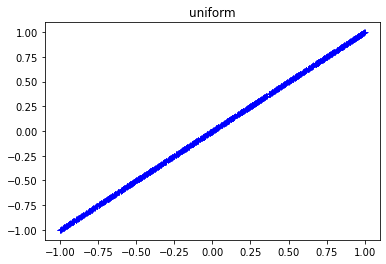

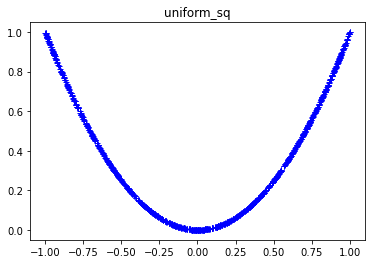

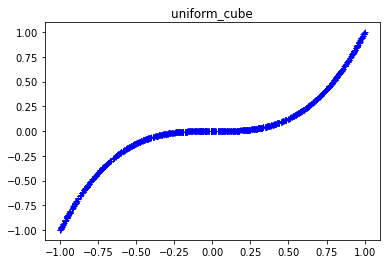

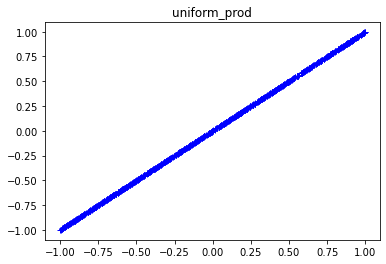

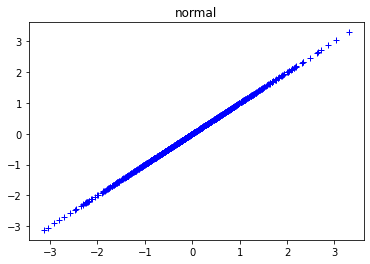

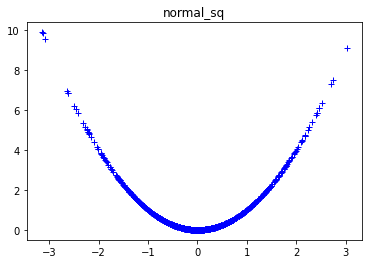

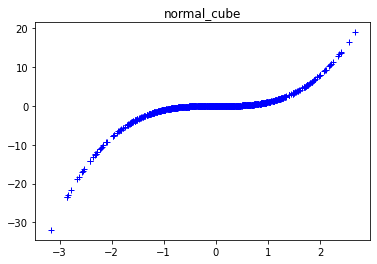

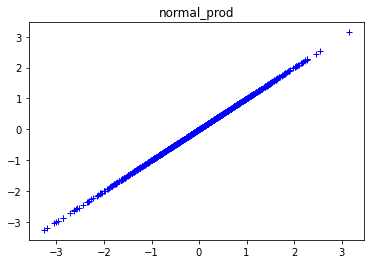

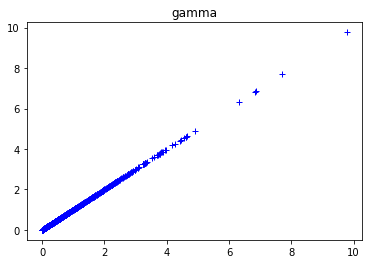

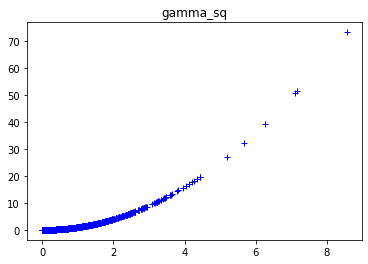

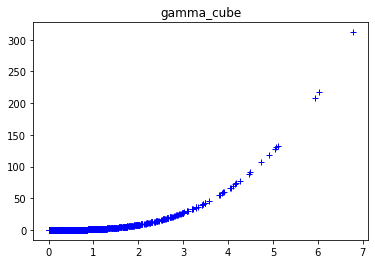

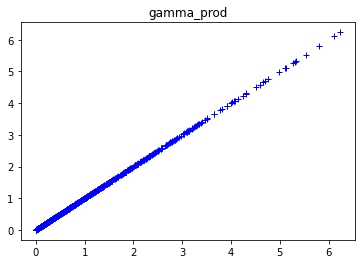

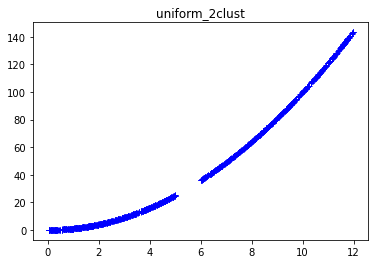

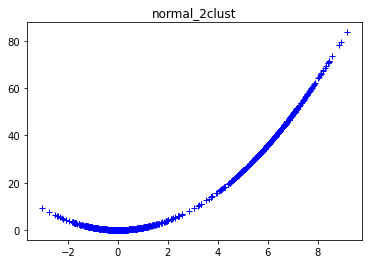

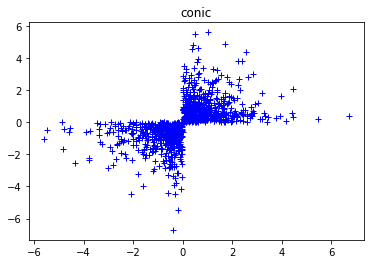

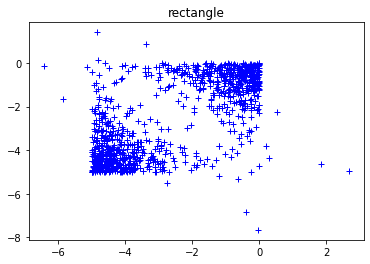

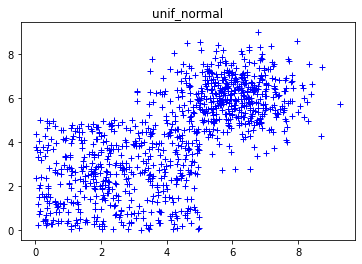

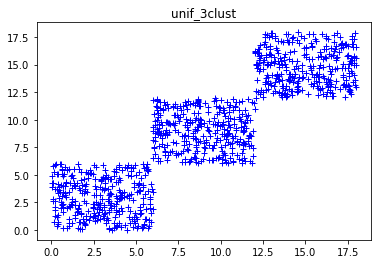

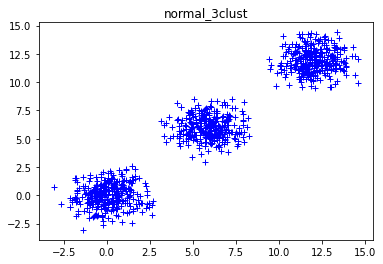

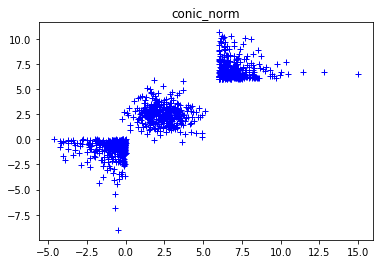

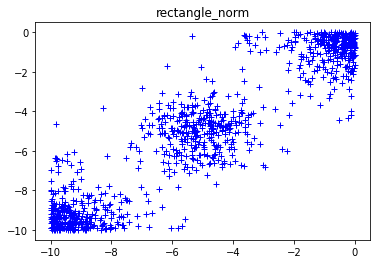

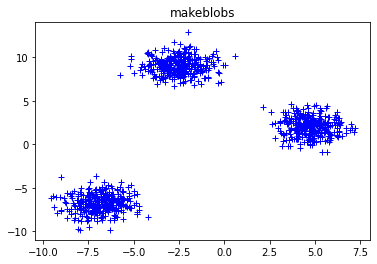

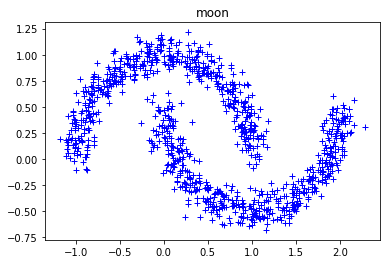

In [13]:
data_keys = list(generate_data_methods.keys())
for key in data_keys:
    X = generate_data_methods[key](1000)
    plt.plot( [a[0] for a in X], [a[1] for a in X], 'b+')
    plt.title('{}'.format(key))
    plt.savefig('{}.png'.format(key))
    plt.show()

## Viewing the effect of the obkmeans on the data generated

In [15]:
rows = [0,1,2,3,4,5,6,7]*3
cols = [0]*8 + [1]*8 + [2]*8
#print( '{}\n{}'.format(cols,rows) )
rcd = list(zip(rows,cols, data_dist_keys))
print('n_rows\tn_columns\tDistribution')
for r,c,d in rcd:
    print('{}\t{}\t{}'.format(r,c,d))


n_rows	n_columns	Distribution
0	0	uniform
1	0	uniform_sq
2	0	uniform_cube
3	0	uniform_prod
4	0	normal
5	0	normal_sq
6	0	normal_cube
7	0	normal_prod
0	1	gamma
1	1	gamma_sq
2	1	gamma_cube
3	1	gamma_prod
4	1	uniform_2clust
5	1	normal_2clust
6	1	conic
7	1	rectangle
0	2	unif_normal
1	2	unif_3clust
2	2	normal_3clust
3	2	conic_norm
4	2	rectangle_norm
5	2	makeblobs
6	2	moon


In [ ]:
# n_true_clusters = 1
k = 20
d = 2
# Create k-means clustering plots

# Set the figure size 

fig,ax = plt.subplots(8,3,figsize = (15, 50))
i = 0

for r,c,data_dist_key in rcd:
    
    kmeans = OnlineBalancedKmeans(k, d, alpha=0.2, beta=0.01, inference_method={'method': 'weights', 'alpha': 0.0}, data_distribution=data_dist_key)
    # kmeans = OnlineBalancedKmeans(k=k, d=2, alpha=0.2, beta=0.2)
    # Create a dataset of 2D distributions
    X_train = generate_data_methods[data_dist_key](10000)

    for index, data_point in enumerate(X_train):
        kmeans.assign_and_update(data_point)
    labels = kmeans.final_clusters(X_train)
    class_indices = kmeans.cluster_indices
    sns.scatterplot(x=[X[0] for X in X_train],
                    y=[X[1] for X in X_train],
                    hue=labels,
                    #style=true_labels,
                    palette="deep",
                    legend=None,
                    ax = ax[r,c]
                    )
    
    class_centers = kmeans.cluster_means
    class_counts = np.unique(labels, return_counts=True)[1]
    # class_counts = kmeans.cluster_counts
    X = [x for x, _ in class_centers]
    Y = [y for _, y in class_centers]
    ax[r,c].plot(X, Y, 'r+', markersize=10, )
    # add labels to all points
    for (xi, yi, counts) in zip(X, Y, class_counts):
        ax[r,c].text(xi, yi, counts, va='bottom', ha='center')
    ax[r,c].set_title('Final iteration {}'.format(data_dist_key))
    # i += 1
    plt.savefig('{}_final_iter.png'.format(data_dist_key))
    #plt.savefig('{}_final_iter.png'.format(data_dist_key))
    #plt.show()
# plt.savefig('OBKmeans.png')
fig.tight_layout()

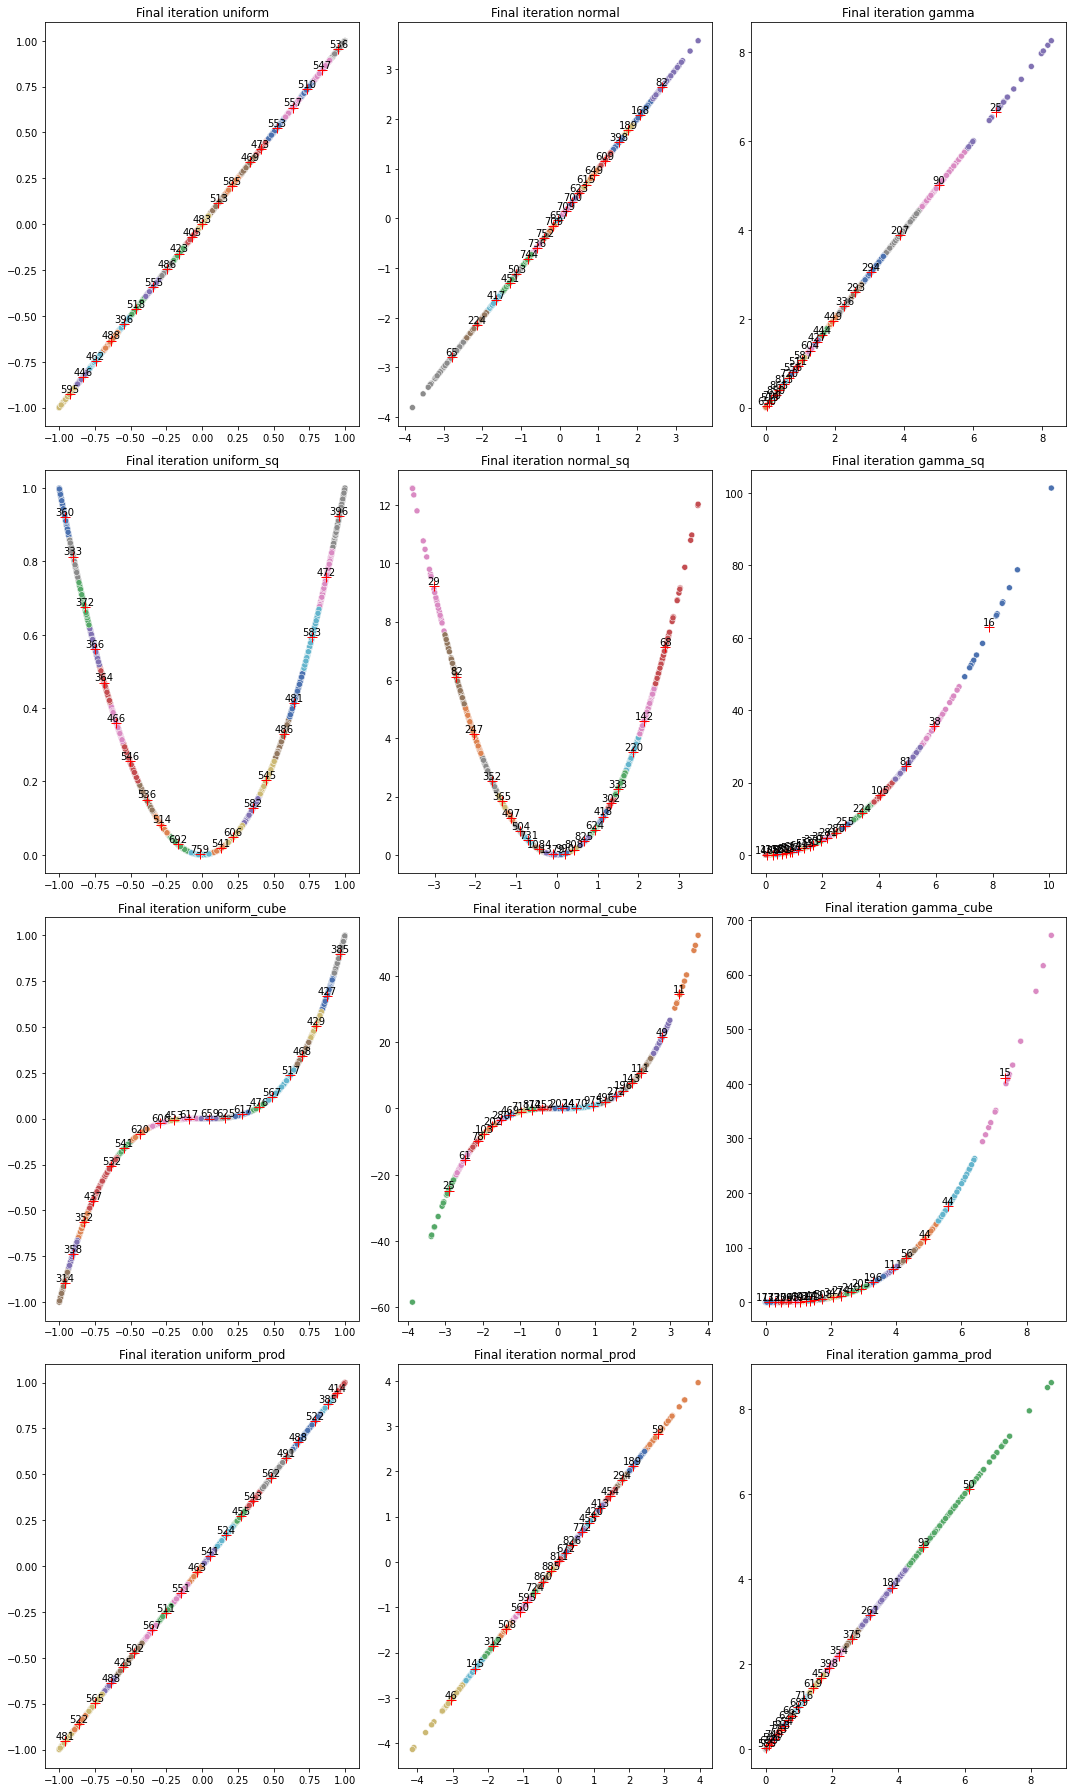

In [17]:
# Viewing the first 12 plots
rows = [0,1,2,3]*3
cols = [0]*4 + [1]*4 + [2]*4
#print( '{}\n{}'.format(cols,rows) )
rcd = list(zip(rows,cols, data_dist_keys))
# print('n_rows\tn_columns\tDistribution')
# for r,c,d in rcd:
#     print('{}\t{}\t{}'.format(r,c,d))
k = 20
d = 2
# Create k-means clustering plots

# Set the figure size 

fig,ax = plt.subplots(4,3,figsize = (15, 25))
i = 0

for r,c,data_dist_key in rcd:
    
    kmeans = OnlineBalancedKmeans(k, d, alpha=0.2, beta=0.01, inference_method={'method': 'weights', 'alpha': 0.0}, data_distribution=data_dist_key)
    # kmeans = OnlineBalancedKmeans(k=k, d=2, alpha=0.2, beta=0.2)
    # Create a dataset of 2D distributions
    X_train = generate_data_methods[data_dist_key](10000)

    for index, data_point in enumerate(X_train):
        kmeans.assign_and_update(data_point)
    labels = kmeans.final_clusters(X_train)
    class_indices = kmeans.cluster_indices
    sns.scatterplot(x=[X[0] for X in X_train],
                    y=[X[1] for X in X_train],
                    hue=labels,
                    #style=true_labels,
                    palette="deep",
                    legend=None,
                    ax = ax[r,c]
                    )
    
    class_centers = kmeans.cluster_means
    class_counts = np.unique(labels, return_counts=True)[1]
    # class_counts = kmeans.cluster_counts
    X = [x for x, _ in class_centers]
    Y = [y for _, y in class_centers]
    ax[r,c].plot(X, Y, 'r+', markersize=10, )
    # add labels to all points
    for (xi, yi, counts) in zip(X, Y, class_counts):
        ax[r,c].text(xi, yi, counts, va='bottom', ha='center')
    ax[r,c].set_title('Final iteration {}'.format(data_dist_key))
    # i += 1
    plt.savefig('{}_final_iter.png'.format(data_dist_key))
    #plt.savefig('{}_final_iter.png'.format(data_dist_key))
    #plt.show()
#plt.savefig('Data_vrs_OBKmeans.png')
fig.tight_layout()

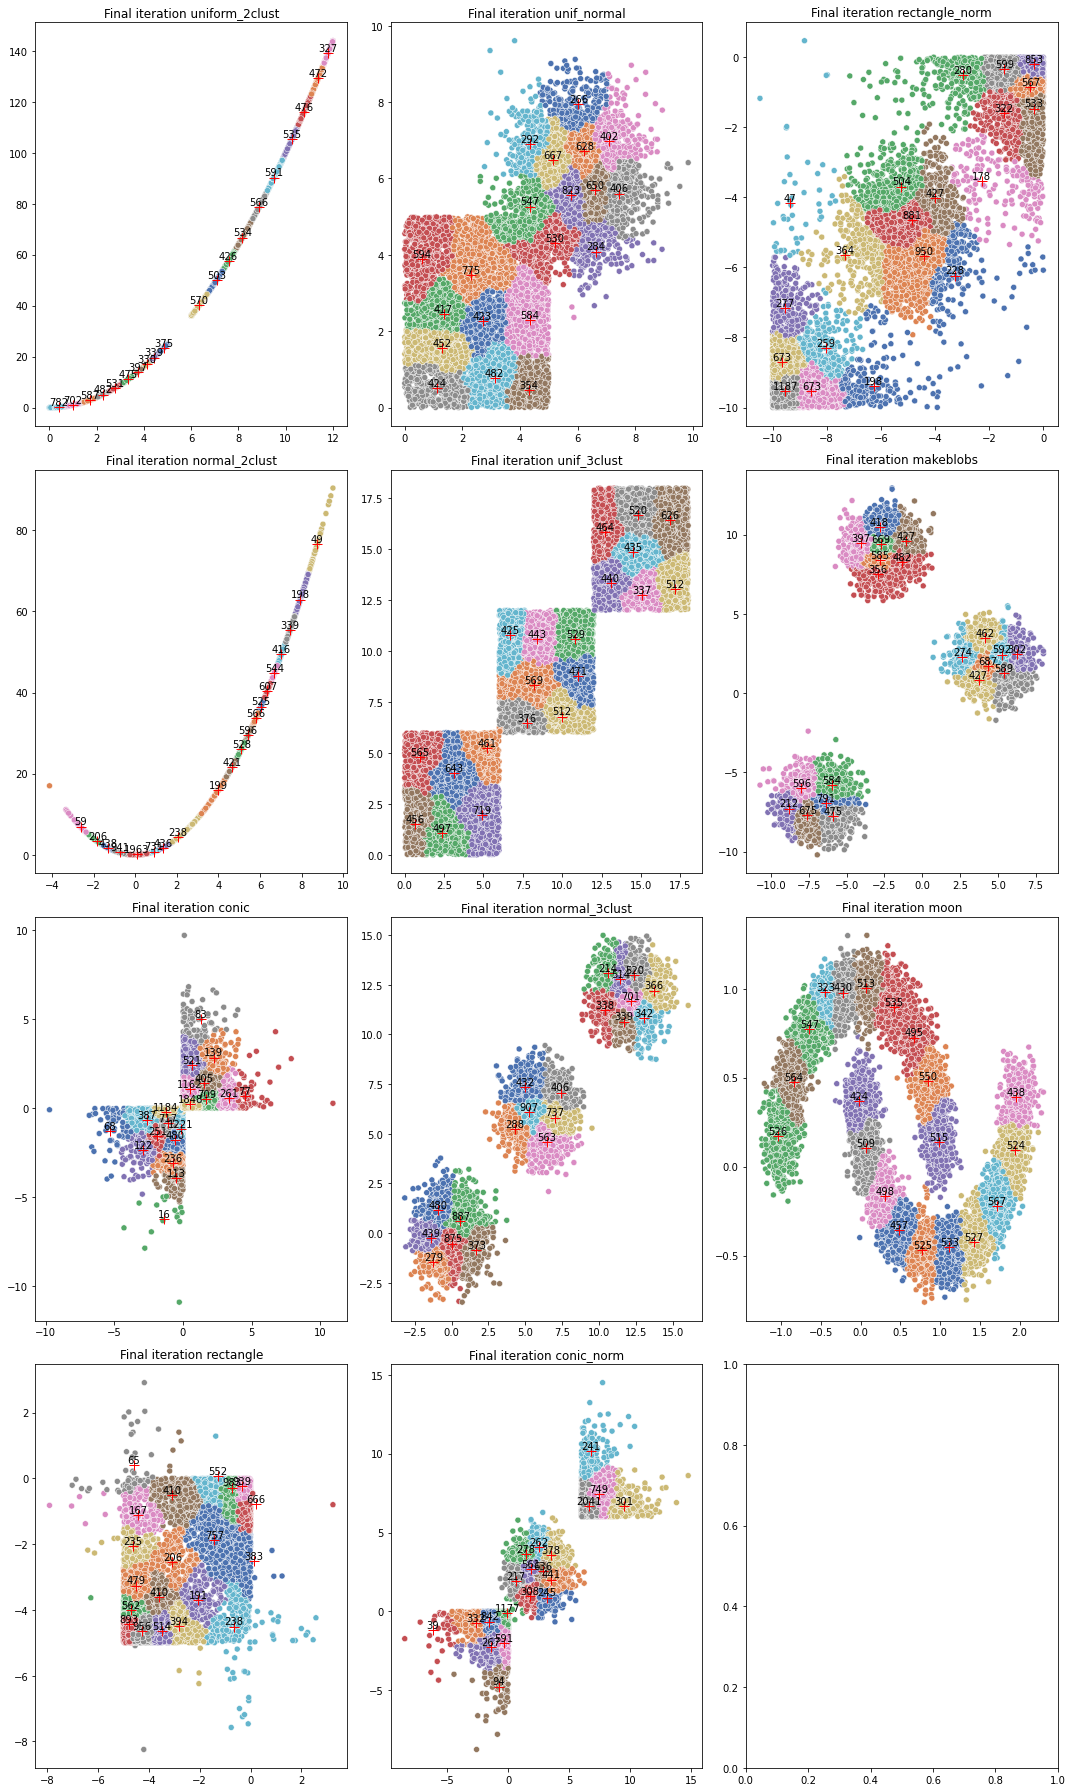

In [32]:
# Viewing the last 11 plots
rows = [0,1,2,3]*3
cols = [0]*4 + [1]*4 + [2]*4
#print( '{}\n{}'.format(cols,rows) )
rcd = list(zip(rows,cols, data_dist_keys[12:]))
# print('n_rows\tn_columns\tDistribution')
# for r,c,d in rcd:
#     print('{}\t{}\t{}'.format(r,c,d))
k = 20
d = 2
# Create k-means clustering plots

# Set the figure size 

fig,ax = plt.subplots(4,3,figsize = (15, 25))
i = 0

for r,c,data_dist_key in rcd:
    
    kmeans = OnlineBalancedKmeans(k, d, alpha=0.2, beta=0.01, inference_method={'method': 'weights', 'alpha': 0.0}, data_distribution=data_dist_key)
    # kmeans = OnlineBalancedKmeans(k=k, d=2, alpha=0.2, beta=0.2)
    # Create a dataset of 2D distributions
    X_train = generate_data_methods[data_dist_key](10000)

    for index, data_point in enumerate(X_train):
        kmeans.assign_and_update(data_point)
    labels = kmeans.final_clusters(X_train)
    class_indices = kmeans.cluster_indices
    sns.scatterplot(x=[X[0] for X in X_train],
                    y=[X[1] for X in X_train],
                    hue=labels,
                    #style=true_labels,
                    palette="deep",
                    legend=None,
                    ax = ax[r,c]
                    )
    
    class_centers = kmeans.cluster_means
    class_counts = np.unique(labels, return_counts=True)[1]
    # class_counts = kmeans.cluster_counts
    X = [x for x, _ in class_centers]
    Y = [y for _, y in class_centers]
    ax[r,c].plot(X, Y, 'r+', markersize=10, )
    # add labels to all points
    for (xi, yi, counts) in zip(X, Y, class_counts):
        ax[r,c].text(xi, yi, counts, va='bottom', ha='center')
    ax[r,c].set_title('Final iteration {}'.format(data_dist_key))
    # i += 1
    plt.savefig('{}_final_iter.png'.format(data_dist_key))
    #plt.savefig('{}_final_iter.png'.format(data_dist_key))
    #plt.show()
# plt.savefig('Data_vrs_OBKmeans2.png')
fig.tight_layout()

### Performance of the Hyperparameters

#### Hyperparameter k

In [19]:
# k vrs losses
k=50
distribution_error_mean = {}
# distributions_loss_mean = {}
loss_vals = {}
cost = {}
error = {}
for data_dist_key in data_dist_keys:
    # distribution_errors = []
    #distribution_loss_repeat = {}
    
    data = generate_data_methods[data_dist_key](n_train + n_test)
    training_data = data[:n_train]
    test_data = data[n_train:]
    assert len(training_data) == n_train
    assert len(test_data) == n_test
    #training_data = generate_data(n_train)
    #test_data = generate_data(n_test)
    kmeans = OnlineBalancedKmeans(k, d, alpha = alpha_, beta = beta_, inference_method={'method': 'weights', 'alpha': 0.4, 'beta':7 } , data_distribution=data_dist_key) # TODO. Copy might not be necessary.
    # Computing the losses and error and storing them in a dict 
    inference_functions = [
        kmeans.infer_euclid_dist, 
        kmeans.infer_norm_weights,
        kmeans.infer_cluster_size, 
        kmeans.infer_weights,
        kmeans.infer_merge_norm_cl_size,
        kmeans.infer_merge_norm_ecl_dis,
        kmeans.infer_cluster_size_exp
    ]
    # Initializing losses
    cost[data_dist_key] = [ kmeans_loss(kmeans, training_data) ]
    # Initializing errors
    total_error = np.zeros_like(inference_functions)
    for datum in test_data:
        true_value = datum[-1]
        predicted_values = [infer(datum) for infer in inference_functions ] #dim = (n_inf,) #kmeans.infer(datum)
        total_error += np.array([compute_error(true_value, pred_value) for pred_value in predicted_values])
        # total_error dim = (n_inf)
    error[data_dist_key] = [np.mean(total_error)] 
    for index, datum in enumerate(training_data):
        kmeans.assign_and_update(datum)
        if index%100 == 0:
            # Compute losses after each 1000 assignments
            cost[data_dist_key].append( kmeans_loss(kmeans, training_data) )
            # Compute errors after each 1000 assignments 
                # Predicted values for all inference methods
            predicted_values = [infer(datum) for infer in inference_functions ]
            # total_error = np.zeros_like(inference_functions)
            for datum in test_data:
                true_value = datum[-1]
                predicted_values = [infer(datum) for infer in inference_functions ] #dim = (n_inf,) #kmeans.infer(datum)
                total_error += np.array([compute_error(true_value, pred_value) for pred_value in predicted_values])
                # total_error dim = (n_inf)
            error[data_dist_key].append( np.mean(total_error) )
    #loss_vals[data_dist_key]= round(cost, 4)
    #distribution_loss_repeat.append(loss_vals)
    #distribution_loss_mean = np.mean(distribution_loss_repeat, axis = 0)
#     distribution_errors = []
#     for repeat in range(n_repeats):
#         for datum in test_data:
#             true_value = datum[-1]
#             predicted_value = kmeans.infer(datum)
#             error[data_dist_key].append( compute_error(true_value, predicted_value) )
#             distribution_errors.append(round(error, 4))
#     distribution_error_mean[data_dist_key] = np.mean(distribution_errors)

In [22]:
error_dist = np.mean(list(error.values()), axis = 0)
loss_dist = np.mean(list(cost.values()), axis = 0)
aa = list(error.items())
b = np.sum(total_error)
print('{}\n{}'.format(np.shape(list(error.values())), np.shape(list(cost.values()))))

(23, 11)
(23, 11)


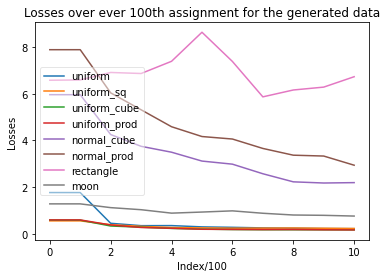

In [24]:
a = cost
#figsi
data_lbl = []
for data_dist_key in data_dist_keys:
    if a[data_dist_key][0]<10:
        data_lbl.append(data_dist_key)
        plt.plot(a[data_dist_key])
        plt.legend(data_lbl, loc = 6, framealpha = 0.5)
    plt.xlabel('Index/100')
    plt.ylabel('Losses')
    plt.title('Losses over ever 100th assignment for the generated data')
    plt.savefig('loss1.png')

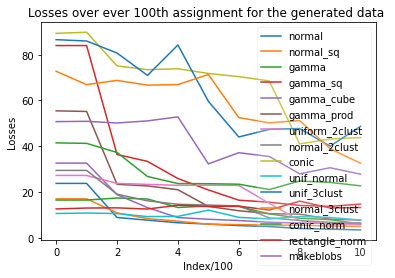

In [25]:
data_lbl = []
for data_dist_key in data_dist_keys:
    if a[data_dist_key][0]>10:
        data_lbl.append(data_dist_key)
        plt.plot(a[data_dist_key])
        plt.legend(data_lbl, loc = 1, framealpha = 0.2)
    plt.xlabel('Index/100')
    plt.ylabel('Losses')
    plt.title('Losses over ever 100th assignment for the generated data ')
    plt.savefig('loss2.png')

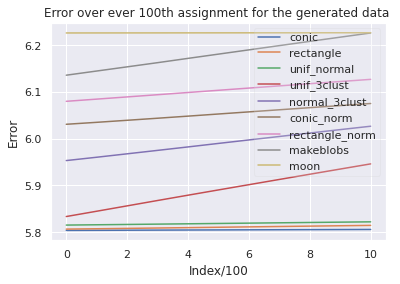

In [287]:
data_lbl = []
for data_dist_key in data_dist_keys:
    if error[data_dist_key][0]/10**6 > 5:
        data_lbl.append(data_dist_key)
        plt.plot(np.array(error[data_dist_key])/10**6)
        plt.legend(data_lbl, loc = 1, framealpha = 0.2)
    plt.xlabel('Index/100')
    plt.ylabel('Error')
    plt.title('Error over ever 100th assignment for the generated data ')
    plt.savefig('error.png')

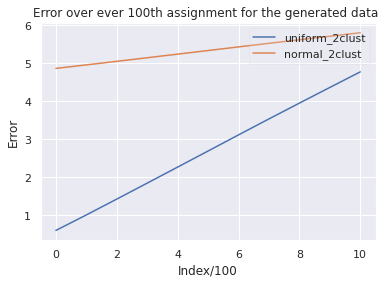

In [288]:
data_lbl = []
for data_dist_key in data_dist_keys:
    if error[data_dist_key][0]/10**6 < 5 and error[data_dist_key][0]/10**6 > 0.5:
        data_lbl.append(data_dist_key)
        plt.plot(np.array(error[data_dist_key])/10**6)
        plt.legend(data_lbl, loc = 1, framealpha = 0.2)
    plt.xlabel('Index/100')
    plt.ylabel('Error')
    plt.title('Error over ever 100th assignment for the generated data ')
    plt.savefig('error2.png')

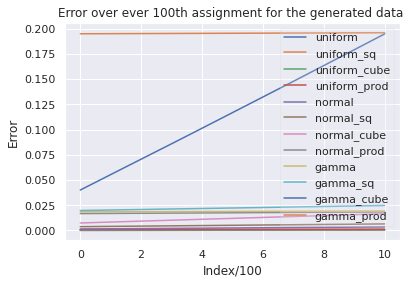

In [289]:
data_lbl = []
for data_dist_key in data_dist_keys:
    if error[data_dist_key][0]/10**6 < 0.5:
        data_lbl.append(data_dist_key)
        plt.plot(np.array(error[data_dist_key])/10**6)
        plt.legend(data_lbl, loc = 1, framealpha = 0.2)
    plt.xlabel('Index/100')
    plt.ylabel('Error')
    plt.title('Error over ever 100th assignment for the generated data ')
    plt.savefig('error3.png')

In [26]:
    # k vrs losses
k = np.linspace(10,100, 10)
kdict_loss = {}
kdict_errors = {}

for k in range(10,50,5):
        loss_vals = {}
        cost = {}
        error = {}
        kdict_loss[k] = []
        kdict_errors[k] = []
        for data_dist_key in data_dist_keys:
            # distribution_errors = []
            #distribution_loss_repeat = {}

            data = generate_data_methods[data_dist_key](n_train + n_test)
            training_data = data[:n_train]
            test_data = data[n_train:]
            assert len(training_data) == n_train
            assert len(test_data) == n_test
            #training_data = generate_data(n_train)
            #test_data = generate_data(n_test)
            kmeans = OnlineBalancedKmeans( k, d=2, alpha = alpha_, beta = beta_, inference_method={'method': 'weights', 'alpha': 0.4, 'beta':7 } , data_distribution=data_dist_key) # TODO. Copy might not be necessary.
            # Computing the losses and error and storing them in a dict 
            inference_functions = [
                kmeans.infer_euclid_dist, 
                kmeans.infer_norm_weights,
                kmeans.infer_cluster_size, 
                kmeans.infer_weights,
                kmeans.infer_merge_norm_cl_size,
                kmeans.infer_merge_norm_ecl_dis,
                kmeans.infer_cluster_size_exp
            ]
            # Initializing losses
            cost[data_dist_key] = [ kmeans_loss(kmeans, training_data) ]
            total_error = np.zeros_like(inference_functions)
            # Initializing errors
            for datum in test_data:
                true_value = datum[-1]
                predicted_values = [infer(datum) for infer in inference_functions ] #dim = (n_inf,) #kmeans.infer(datum)
                total_error += np.array([compute_error(true_value, pred_value) for pred_value in predicted_values])
                # total_error dim = (n_inf)
            error[data_dist_key] = [np.mean(total_error)] 
            for index, datum in enumerate(training_data):
                kmeans.assign_and_update(datum)
                if index%100 == 0:
                    # Compute losses after each 1000 assignments
                    cost[data_dist_key].append( kmeans_loss(kmeans, training_data) )
                    # Compute errors after each 1000 assignments 
                        # Predicted values for all inference methods
                    predicted_values = [infer(datum) for infer in inference_functions ]
                    # total_error = np.zeros_like(inference_functions)
                    for datum in test_data:
                        true_value = datum[-1]
                        predicted_values = [infer(datum) for infer in inference_functions ] #dim = (n_inf,) #kmeans.infer(datum)
                        total_error += np.array([compute_error(true_value, pred_value) for pred_value in predicted_values])
                        # total_error dim = (n_inf)
                    error[data_dist_key].append( np.mean(total_error) )

        mean_losses = np.mean(list(cost.values()), 0) # Values recorded for every 100 iteration
        kdict_loss[k].append(mean_losses)
        mean_errors = np.mean(list(error.values()), 0) # Values recorded for every 100 iteration
        kdict_errors[k].append(mean_errors)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 14 is different from 15)

In [269]:
# Ploting the effect chosen cluster sizes has on the errors and the losses
data_lbl = []
for k in range(50, 100, 10):
    data_lbl.append(k)
    plt.plot(np.array(kdict_loss[k][0]))
    plt.legend(data_lbl, loc = 1, framealpha = 0.2)
    plt.xlabel('index')
    plt.ylabel('losses')
    plt.title('losses over ever every 100th assignment for the respective cluster size')
    plt.savefig('k_loss.png')
    
# fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
# ax[0][0].plot(x,y1)
# ax[0][1].plot(x,y2)

KeyError: 50

KeyError: 20

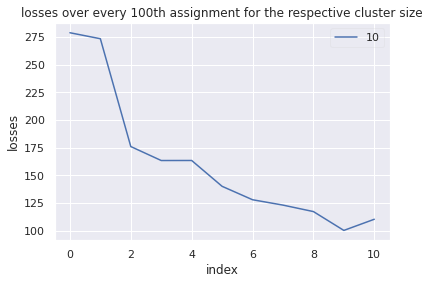

In [291]:
# Ploting the effect chosen cluster sizes has on the errors and the losses
data_lbl = []
for k in range(10, 50, 10):
    data_lbl.append(k)
    plt.plot(np.array(kdict_loss[k][0]))
    plt.legend(data_lbl, loc = 1, framealpha = 0.2)
    plt.xlabel('index')
    plt.ylabel('losses')
    plt.title('losses over every 100th assignment for the respective cluster size')
    plt.savefig('k_loss2.png')

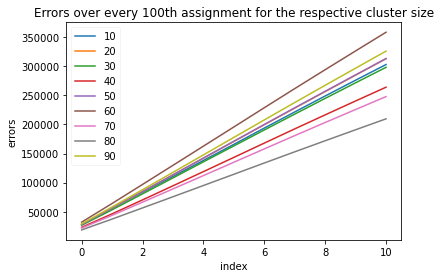

In [259]:
# Ploting the effect chosen cluster sizes has on the errors
data_lbl = []
for k in range(10, 100, 10):
    data_lbl.append(k)
    plt.plot(np.array(kdict_errors[k][0]))
    plt.legend(data_lbl, loc = 2, framealpha = 0.2)
    plt.xlabel('index')
    plt.ylabel('errors')
    plt.title('Errors over every 100th assignment for the respective cluster size')
    plt.savefig('k_lerrors.png')

#### Hyperparameter self.alpha

In [300]:
np.shape(list(kdict_errors.values()))

(2,)

#### Hyperparameter self.beta

### Confidence interval plots evaluation

In [262]:
def confidence_interval(data, p=0.95, n=1000):
    lower = []
    upper = []

    for _data in data.T:
        samples = []
        for i in range(n):
            sample = np.random.choice(_data, size=len(_data), replace=True)
            samples.append(np.mean(sample))
        samples.sort()

        upper_value = p #(1 + p) / 2
        lower_value = (1 - upper_value)
        lower_index = int(np.floor(n * lower_value))
        upper_index = int(np.floor(n * upper_value))

        lower.append(samples[lower_index])
        upper.append(samples[upper_index])

    return lower, upper

In [264]:
CI = {}
for data_dist_key in data_dist_keys:
    CI[data_dist_key] = confidence_interval(generate_data_methods[data_dist_key](n_train))
np.shape(list(CI.values()))

(23, 2, 2)

<AxesSubplot:>

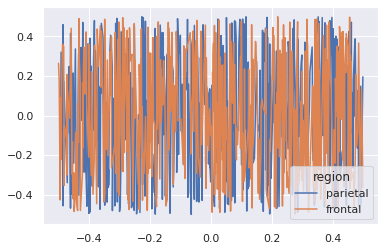

In [308]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x= np.random.uniform(-0.5, 0.5,1064) ,
             y= np.random.uniform(-0.5, 0.5,1064),
             hue='region',
             data=fmri)

In [306]:
fmri.shape

(1064, 5)

In [ ]:
# Visualise in 3d
d = 3
for data_dist_key in data_dist_keys:
    X_train = generate_data_methods[data_dist_key](10000)
    kmeans = OnlineBalancedKmeans(k, d, alpha, beta, inference_method=inference_method.copy(), data_distribution = data_dist_key)
    for index, data_point in enumerate(X_train):
        kmeans.assign_and_update(data_point)
        if index == len(X_train )- 1:
            labels = kmeans.cluster_indices
            sns.set_style ("darkgrid")
            plot_mean = 3
            min_num = 30
            x=[X[0] for X in X_train[:index+1,:]]
            y=[X[1] for X in X_train[:index+1,:]]
            z=[X[2] for X in X_train[:index+1,:]]
    #         plot1 =  np.random.normal (plot_mean, 1, size = min_num)
    #         plot2 = np.random.normal (plot_mean, 1, size = min_num)
    #         plot3 = np.random.normal (plot_mean, 1, size = min_num)
            plt.figure (figsize = (5, 4))
            seaborn_plot = plt.axes (projection='3d')
            print (type (seaborn_plot))
            seaborn_plot.scatter3D (x, y, z, c= labels[:index+1], alpha = 1)
            # seaborn_plot.scatter3D (plot1, plot2, plot3)
            seaborn_plot.set_xlabel ('x')
            seaborn_plot.set_ylabel ('y')
            seaborn_plot.set_zlabel ('z')
            plt.title('{}'.format(data_dist_key))
            #plt.savefig("unif_3d")
            plt.show ()

In [ ]:
# Visualise in 3d
d = 3
for data_dist_key in data_dist_keys:
    X_train = generate_data_methods[data_dist_key](10000)
    kmeans = OnlineBalancedKmeans(k, d, alpha = 0.2, beta= 0.01, inference_method=inference_method.copy(), data_distribution = data_dist_key)
    for index, data_point in enumerate(X_train):
        kmeans.assign_and_update(data_point)
        # if index == len(X_train )- 1:
    labels = kmeans.final_clusters(X_train)
    sns.set_style ("darkgrid")
    plot_mean = 3
    min_num = 30
    x=[X[0] for X in X_train[:index+1,:]]
    y=[X[1] for X in X_train[:index+1,:]]
    z=[X[2] for X in X_train[:index+1,:]]
#         plot1 =  np.random.normal (plot_mean, 1, size = min_num)
#         plot2 = np.random.normal (plot_mean, 1, size = min_num)
#         plot3 = np.random.normal (plot_mean, 1, size = min_num)
    plt.figure (figsize = (5, 4))
    seaborn_plot = plt.axes (projection='3d')
    print (type (seaborn_plot))
    seaborn_plot.scatter3D (x, y, z, c= labels[:index+1], alpha = 1)
    # seaborn_plot.scatter3D (plot1, plot2, plot3)
    seaborn_plot.set_xlabel ('x')
    seaborn_plot.set_ylabel ('y')
    seaborn_plot.set_zlabel ('z')
    plt.title('{}'.format(data_dist_key))
    #plt.savefig("unif_3d")
    plt.show ()

#### Visualizing the updates of Data points from a Uniform distribution

In [ ]:
# Visualise in 2d
n_true_clusters = 2
k = 50
d = 2
alpha=0.1
beta=0
# Create k-means clustering object
kmeans = OnlineBalancedKmeans(k, d, alpha=0.2, beta=0.01, inference_method={'method': 'weights', 'alpha': 0.0}, data_distribution='uniform')
# Create a dataset of 2D distributions
X_train = np.random.uniform(low=-5, high=5, size=[10000, 2])

for index, data_point in enumerate(X_train):
  kmeans.assign_and_update(data_point)
  if index % 1000 == 0 or index == len(X_train )- 1:
    class_centers = kmeans.cluster_means
    labels = kmeans.cluster_indices
    sns.scatterplot(x=[X[0] for X in X_train[:index+1,:]],
                    y=[X[1] for X in X_train[:index+1,:]],
                    hue=labels[:index+1],
                    #style=true_labels,
                    palette="deep",
                    legend=None
                    )
    plt.plot([x for x, _ in class_centers],
            [y for _, y in class_centers],
            'r*',
            markersize=10,
            )
    plt.title('iteration {}'.format(index))
    plt.savefig('uniform_clusters_iteration_{}.png'.format(index))
    plt.show()

In [ ]:

d = 3
X_train = generate_data_uniform_cube(10000)
kmeans = OnlineBalancedKmeans(k, d, alpha, beta, inference_method=inference_method.copy())
for index, data_point in enumerate(X_train):
  kmeans.assign_and_update(data_point)
  if index % 200 == 0 or index == len(X_train )- 1:
        labels = kmeans.cluster_indices
        sns.set_style ("darkgrid")
        plot_mean = 3
        min_num = 30
        x=[X[0] for X in X_train[:index+1,:]]
        y=[X[1] for X in X_train[:index+1,:]]
        z=[X[2] for X in X_train[:index+1,:]]
#         plot1 =  np.random.normal (plot_mean, 1, size = min_num)
#         plot2 = np.random.normal (plot_mean, 1, size = min_num)
#         plot3 = np.random.normal (plot_mean, 1, size = min_num)
        plt.figure (figsize = (5, 4))
        seaborn_plot = plt.axes (projection='3d')
        print (type (seaborn_plot))
        seaborn_plot.scatter3D (x, y, z, c= labels[:index+1], alpha = 1)
        # seaborn_plot.scatter3D (plot1, plot2, plot3)
        seaborn_plot.set_xlabel ('x')
        seaborn_plot.set_ylabel ('y')
        seaborn_plot.set_zlabel ('z')
        plt.savefig("unif_3d")
        plt.show ()

In [ ]:
n_true_clusters = 2
k = 50
# Create k-means clustering object
kmeans = OnlineBalancedKmeans(k, d, alpha, beta, inference_method={'method': 'weights', 'alpha': 0.0})
# kmeans = OnlineBalancedKmeans(k=k, d=2, alpha=0.2, beta=0)
# Create a dataset of 2D distributions
# X_train, true_labels = make_blobs(n_samples=10000, centers = n_true_clusters)
# X_train = StandardScaler().fit_transform(X_train)
X_train = np.random.normal(size = (1000,2))

for index, data_point in enumerate(X_train):
  kmeans.assign_and_update(data_point)
  labels = kmeans.cluster_indices
  if index % 200 == 0 or index+1 == len(X_train ):
    class_centers = kmeans.cluster_means
    class_labels = kmeans.cluster_indices
    sns.scatterplot(x=[X[0] for X in X_train[:index,:]],
                    y=[X[1] for X in X_train[:index,:]],
                    hue=class_labels[:index],
                    # style=true_labels[:index],
                    palette="deep",
                    legend=None
                    )
    plt.plot([x for x, _ in class_centers],
            [y for _, y in class_centers],
            'r+',
            markersize=10,
            )
    plt.title('iteration {}'.format(index))
    plt.show()

sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=labels,
                #style=true_labels,
                palette="deep",
                legend=None
                )
class_centers = kmeans.cluster_means
class_counts = np.unique(labels, return_counts=True)[1]
X = [x for x, _ in class_centers]
Y = [y for _, y in class_centers]
plt.plot(X, Y, 'r+', markersize=10, )
for (xi, yi, counts) in zip(X, Y, class_counts):
    plt.text(xi, yi, counts, va='bottom', ha='center')
plt.title('Final iteration')
plt.show()

### Visualising the Counts of each cluster~: Normal distribution N(0,1)

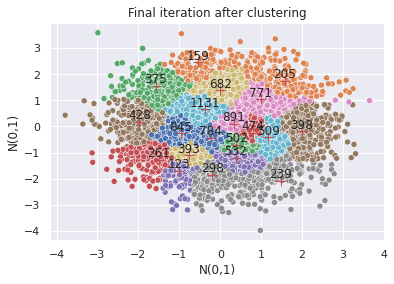

In [327]:
n_true_clusters = 1
k = 20
alpha = 0.3
beta = 0.01
# Create k-means clustering object
kmeans = OnlineBalancedKmeans(k, d, alpha, beta, inference_method={'method': 'weights', 'alpha': 0.0})
# kmeans = OnlineBalancedKmeans(k=k, d=2, alpha=0.2, beta=0.01)
# Create a dataset of 2D distributions
X_train = np.random.normal(size = (10000,2))

for index, data_point in enumerate(X_train):
    kmeans.assign_and_update(data_point)
labels = kmeans.final_clusters(X_train)
# class_indices = kmeans.cluster_indices
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=labels,
                #style=true_labels,
                palette="deep",
                legend=None
                )
class_centers = kmeans.cluster_means
class_counts = np.unique(labels, return_counts=True)[1]
X = [x for x, _ in class_centers]
Y = [y for _, y in class_centers]
plt.plot(X, Y, 'r+', markersize=10, )
for (xi, yi, counts) in zip(X, Y, class_counts):
    plt.text(xi, yi, counts, va='bottom', ha='center')
plt.title('Final iteration after clustering')
plt.xlabel('N(0,1)')
plt.ylabel('N(0,1)')
plt.savefig('normal_final_iter.png')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/Desktop/Graduate/AIMS_101/Final Research work/AIMS_Gh-Research-Project_Temp/images/normal_raw_data.png'

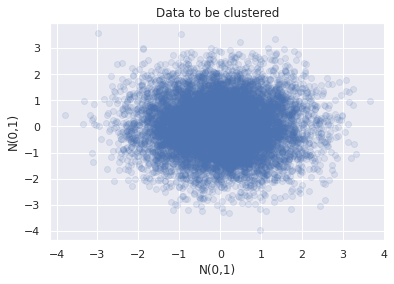

In [333]:
plt.scatter(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],alpha=0.12)
plt.title('Data to be clustered')
plt.xlabel('N(0,1)')
plt.ylabel('N(0,1)')
plt.savefig('/Desktop/Graduate/AIMS_101/Final Research work/AIMS_Gh-Research-Project_Temp/images/normal_raw_data.png')
plt.show()

### Visualising the Counts of each cluster~: Uniform distribution U(-5,5)

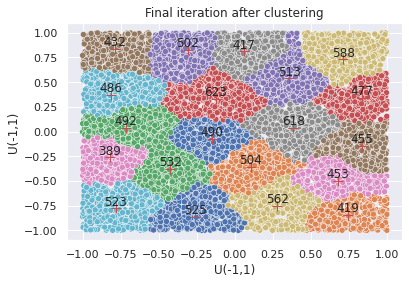

In [324]:
n_true_clusters = 1
k = 20
# Create k-means clustering object
kmeans = OnlineBalancedKmeans(k, d, alpha=0.2, beta=0.01, inference_method={'method': 'weights', 'alpha': 0.0})
# kmeans = OnlineBalancedKmeans(k=k, d=2, alpha=0.2, beta=0.2)
# Create a dataset of 2D distributions
X_train = np.random.uniform(low=-1, high=1, size=[10000, 2])

for index, data_point in enumerate(X_train):
  kmeans.assign_and_update(data_point)
labels = kmeans.final_clusters(X_train)
class_indices = kmeans.cluster_indices
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=labels,
                #style=true_labels,
                palette="deep",
                legend=None
                )
class_centers = kmeans.cluster_means
class_counts = np.unique(labels, return_counts=True)[1]
# class_counts = kmeans.cluster_counts
X = [x for x, _ in class_centers]
Y = [y for _, y in class_centers]
plt.plot(X, Y, 'r+', markersize=10, )
# add labels to all points
for (xi, yi, counts) in zip(X, Y, class_counts):
    plt.text(xi, yi, counts, va='bottom', ha='center')
plt.title('Final iteration after clustering')
plt.xlabel('U(-1,1)')
plt.ylabel('U(-1,1)')
plt.savefig('final_unif.png')
plt.show()


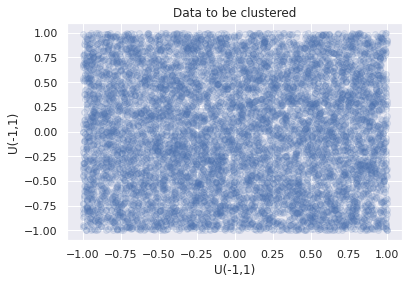

In [325]:
plt.scatter(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],alpha=0.12)
plt.title('Data to be clustered')

plt.xlabel('U(-1,1)')
plt.ylabel('U(-1,1)')
plt.savefig('raw_data_unif.png')
plt.show()
